In [1]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install wordcloud

Visualizations based on pandas df:

#df = pd.DataFrame(file[0], columns =['Tweet_ID', 'Tweet_Text','Pos_Score',Neg_Score','Score'])

In [0]:
#loading test df
df = pd.read_csv('/content/drive/My Drive/School/Data 602/test_data.csv')

In [4]:
df.head()


,Unnamed: 0,Tweet_ID,Tweet_Text,Pos_Score,Neg_Score,Score
0,0,1248707651552399361,teamalana ye busy short weeks ai retailtech...,0.000000,0.000000,negative
1,1,1248707737829232646,selfdrivingcars via nodexl https co ooy drwf...,0.000000,0.000000,negative
2,2,1248708637947760643,droit ia google created innovative ai outp...,0.040000,0.080000,negative
3,3,1248707837716574211,drmattcrowson epidemic modeling covid mo...,0.086957,0.043478,positive
4,4,1248708701021708288,introductory material machine learning isn gea...,0.000000,0.000000,negative


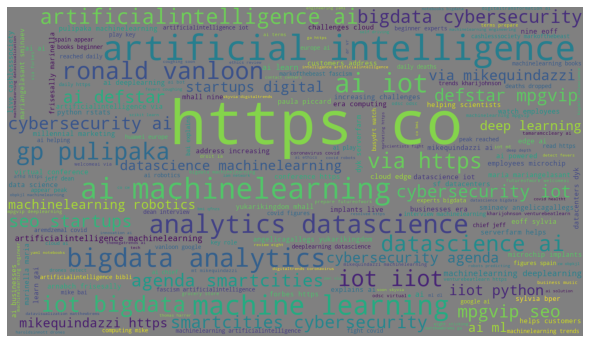

In [5]:
#  generate WordCloud for Tweet_Text
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the column 
for val in df['Tweet_Text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1400, height = 800, 
                background_color ='gray', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('Tweet_Text_wordcloud.png', bbox_inches = "tight")
  
plt.show() 

In [6]:
#Create dataframe for positive tweets
df_pos = df.loc[df['Score'] == 'positive']
df_pos.head()

,Unnamed: 0,Tweet_ID,Tweet_Text,Pos_Score,Neg_Score,Score
3,3,1248707837716574211,drmattcrowson epidemic modeling covid mo...,0.086957,0.043478,positive
9,9,1248707835707437057,convolutional neural network classification di...,0.027778,0.000000,positive
11,11,1248708903304663041,hudson chatbots persona scramble true sequ...,0.035714,0.000000,positive
12,12,1248709656647737347,brockpierce friday im honored speaker coin...,0.043478,0.000000,positive
13,13,1248709450338201600,logo designi creative logo design flat minimal...,0.076923,0.000000,positive


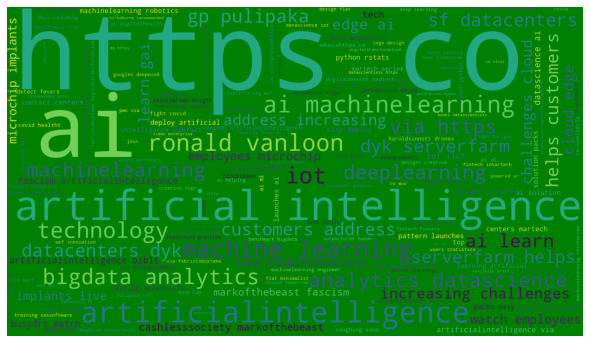

In [7]:
# generate WordCloud for Tweet_Text where Score is Positive
# Note that a new dataframe for only positive tweets is created
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  

comment_words = ' '
stopwords = set(STOPWORDS) 

df_pos = df.loc[df['Score'] == 'positive']
  
# iterate through the column 
for val in df_pos['Tweet_Text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1400, height = 800, 
                background_color ='green', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('Tweet_Text_pos_wordcloud.png', bbox_inches = "tight")
  
plt.show() 

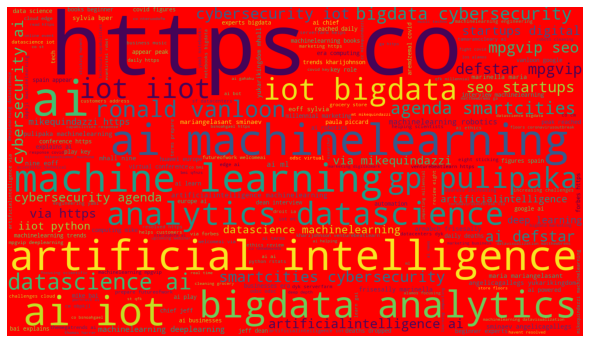

In [12]:
# generate WordCloud for Tweet_Text where Score is Negative
# Note that a new dataframe for negetive tweets is created
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  

comment_words = ' '
stopwords = set(STOPWORDS) 

df_neg = df.loc[df['Score'] == 'negative']
  
# iterate through the column 
for val in df_neg['Tweet_Text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1400, height = 800, 
                background_color ='red', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('Tweet_Text_neg_wordcloud.png', bbox_inches = "tight")
  
plt.show() 

In [24]:
ps_df = df[df["Score"] == "positive"]
ng_df = df[df["Score"] == 'negative']
cl_df = pd.concat([ps_df, ng_df], axis=0)

cl_df.head()

,Unnamed: 0,Tweet_ID,Tweet_Text,Pos_Score,Neg_Score,Score
3,3,1248707837716574211,drmattcrowson epidemic modeling covid mo...,0.086957,0.043478,positive
9,9,1248707835707437057,convolutional neural network classification di...,0.027778,0.000000,positive
11,11,1248708903304663041,hudson chatbots persona scramble true sequ...,0.035714,0.000000,positive
12,12,1248709656647737347,brockpierce friday im honored speaker coin...,0.043478,0.000000,positive
13,13,1248709450338201600,logo designi creative logo design flat minimal...,0.076923,0.000000,positive


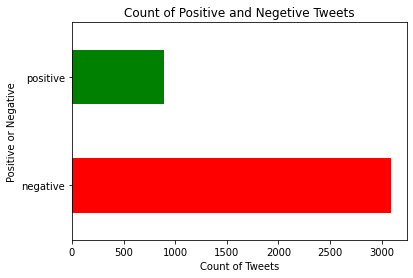

In [27]:
# Plot the count of Positive and Negative Tweets
df_score_count = cl_df['Score'].value_counts()


ag_plot = df_score_count.plot.barh(color=['red', 'green'])

ag_plot.set_xlabel('Count of Tweets')
ag_plot.set_ylabel('Positive or Negative')
ag_plot.set_title('Count of Positive and Negetive Tweets')

plt.savefig('score_count.png', bbox_inches = "tight")